Fallstudie:<br> 
**Erstellen eines Prognosemodells des Kreditkartenzahlungsverkehr für Online-Einkäufe**


In [71]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='dark',)
sns.set_color_codes(palette="deep")
sns.set_palette(sns.color_palette("rocket"))

%matplotlib inline

# Business understanding
**Aktuelle Situation:**<br>
- Einzelhandelsunternehmen hat Verträge mit 4 versch. payment service provider (PSP) für Online-Kreditkartenzahlungen
- Auswahl eines PSPs für eine Überweisung erfolgt auf Basis eines fixen Regelwerks
- Ausfallrate an Online-Kreditkartenzahlungen ist hoch
- Konsequenz: hohe Kosten für das Unternehmen und unzufriedene Kunden

**Geschäftsziele:**<br>
- Ablösen des fixen, manuellen Regelwerks durch ein Prognosemodell zur Auswahl eines PSPs für eine Zahlung
- Verbesserung der Erfolgsrate der Transaktionen
- Reduzierung der Transaktionskosten

**Erfolgskriterien:**<br>
- höhere Erfolgsrate der Transaktionen
- und niedrigere Transaktionskosten gegenüber der aktuellen Situation

# Data understanding

## Collect initial data
**Hauptdatensatz:**<br>
Initialer Datensatz vom Januar und Februar 2019 mit den Kreditkartentransaktionen der DACH Länder<br>

**Kostendaten:**<br>

In [2]:
# transactions
df_t_in = pd.read_excel("../data/01_raw/PSP_Jan_Feb_2019.xlsx").set_index(keys="Unnamed: 0", drop=True)

In [3]:
df_t_in.head()

,tmsp,country,amount,success,PSP,3D_secured,card
Unnamed: 0,,,,,,,
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [4]:
# cost data
cost_dict = {"PSP_name": ["Moneycard", "Goldcard", "UK_Card", "Simplecard"], 
             "fee_success_EUR": [5, 10, 3, 1], 
             "fee_failed_EUR": [2, 5, 1, 0.5]}
df_cost_in = pd.DataFrame(cost_dict, columns=["PSP_name", "fee_success_EUR", "fee_failed_EUR"])

In [5]:
df_cost_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PSP_name         4 non-null      object 
 1   fee_success_EUR  4 non-null      int64  
 2   fee_failed_EUR   4 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 228.0+ bytes


## Describe data
6 unabhängige Variablen und 1 Zielvariable (success)<br>
Datenformat korrekt erkannt<br>
keine fehlenden Werte<br>

In [6]:
df_t_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50410 entries, 0 to 50409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tmsp        50410 non-null  datetime64[ns]
 1   country     50410 non-null  object        
 2   amount      50410 non-null  int64         
 3   success     50410 non-null  int64         
 4   PSP         50410 non-null  object        
 5   3D_secured  50410 non-null  int64         
 6   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 3.1+ MB


In [7]:
df_t_in.describe()

,tmsp,amount,success,3D_secured
count,50410,50410.000000,50410.000000,50410.000000
mean,2019-01-29 16:28:52.923269120,202.395715,0.202896,0.238266
min,2019-01-01 00:01:11,6.000000,0.000000,0.000000
25%,2019-01-14 12:00:36.249999872,133.000000,0.000000,0.000000
50%,2019-01-30 15:20:07.500000,201.000000,0.000000,0.000000
75%,2019-02-13 01:09:50.500000,269.000000,0.000000,0.000000
max,2019-02-28 23:48:19,630.000000,1.000000,1.000000
std,NaN,96.274730,0.402160,0.426027


In [9]:
# raw x- and y-variables
x_raw = ["tmsp", "country", "amount", "PSP", "3d_secured", "card"]
y_raw = ["success"]

## Explore data

In [69]:
# plot dimensions
plot_width = 20
plot_height = 6
sns.color_palette("rocket")
palette_success ={0: "r", 1: "g"}

# masking df_t_in successful and failed
mask_success = df_t_in["success"] == 1
mask_fail = df_t_in["success"] == 0

### Timestamp

C:\Users\czump\anaconda3\envs\venv_iu_model_engineering\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

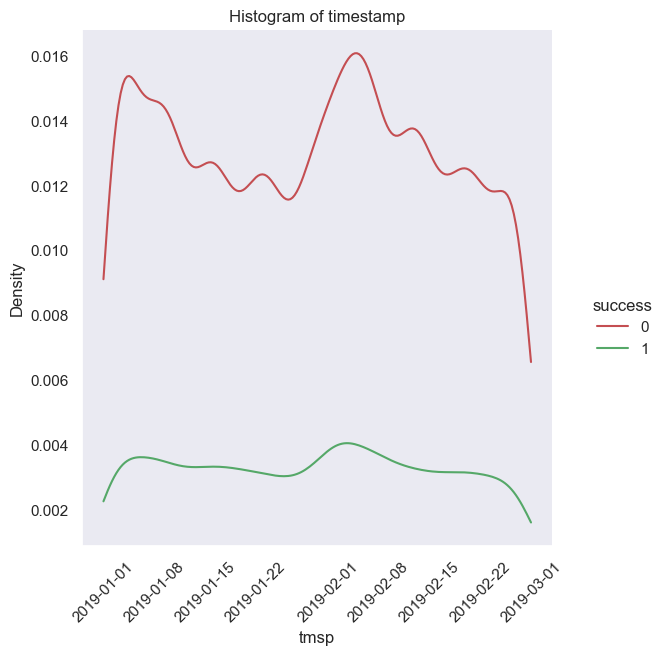

In [72]:
plt.figure()
sns.color_palette("rocket")
sns.displot(df_t_in, x="tmsp", hue="success", kind="kde", cut=0, height=plot_height, palette=palette_success)
plt.xticks(rotation=45)
plt.title("Histogram of timestamp")
plt.show()
plt.close()

## Verify data quality